In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
import pprint

#use linregplot to easily generate a scatterplot with linear regression line and formula from a dataframe - linregplot(dataframe, column name for x, column name for y, x axis label, y axis label)
from scatterplot_generator import linregplot

# Import API key
from api_keys import api_key

In [58]:
# read in csv
oscar_data= pd.read_csv("Resources/oscar_data.csv")
oscar_data.head()

,Year,Host,Most Nominations,Most Wins,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4,Nominee 5,...,Best Costume Design (Black and White),Nominee 1.31,Nominee 2.31,Nominee 3.30,Nominee 4.30,Best Costume Design (Color),Nominee 1.32,Nominee 2.32,Nominee 3.31,Nominee 4.31
0,1927/28,Douglas Fairbanks,Seventh Heaven (5),Seventh Heaven AND Sunrise: A Song of Two Huma...,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness,The Crowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928/29,William C. DeMille,In Old Arizona AND The Patriot (5),None (No Film Won More Than One Award),The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929/30,Conrad Nagel,The Love Parade (6),All Quiet on the Western Front AND The Big Hou...,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930/31,Lawrence Grant,Cimarron (7),Cimarron (3),Cimarron,East Lynne,The Front Page,Skippy,Trader Horn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931/32,Conrad Nagel,Arrowsmith AND The Champ (4),Bad Girl AND The Champ (2),Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final,One Hour with You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
all_nominees = oscar_data[["Year", "Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]
all_nominees

#Can we do all nominees in every category just for one year as well?

,Year,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4
0,1927/28,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness
1,1928/29,The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot
2,1929/30,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade
3,1930/31,Cimarron,East Lynne,The Front Page,Skippy,Trader Horn
4,1931/32,Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final
...,...,...,...,...,...,...
91,2019,Parasite,1917,Ford v Ferrari,The Irishman,Jojo Rabbit
92,2020,Nomadland,The Father,Judas and the Black Messiah,Mank,Minari
93,2021,CODA,Belfast,Don't Look Up,Drive My Car,Dune
94,2022,Everything Everywhere All At Once,All Quiet on the Western Front,Avatar: The Way of Water,The Banshees of Inisherin,Elvis


In [22]:
# create empty lists for movie ids, titles, votes, and release dates.
'''movie_ids = []
titles = []
votes = []
release_dates = []
# "for loop" to loop through each page of the response json.
for i in range(1,int(total_pages)+1):
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}&page={i}').json()
 # second "for loop" to loop through the page, retrieve all the necessary info, and append to the empty lists
    for i in range(len(all_movies_response["results"])):

        movie_id = all_movies_response["results"][i]["id"]
        title = all_movies_response["results"][i]["original_title"]
        vote = all_movies_response["results"][i]["vote_average"]
        release_date = all_movies_response["results"][i]["release_date"]

        movie_ids.append(movie_id)
        titles.append(title)
        votes.append(vote)
        release_dates.append(release_date)'''

'movie_ids = []\ntitles = []\nvotes = []\nrelease_dates = []\n\nfor i in range(1,int(total_pages)+1):\n    all_movies_response = requests.get(f\'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}&page={i}\').json()\n    \n    for i in range(len(all_movies_response["results"])):\n\n        movie_id = all_movies_response["results"][i]["id"]\n        title = all_movies_response["results"][i]["original_title"]\n        vote = all_movies_response["results"][i]["vote_average"]\n        release_date = all_movies_response["results"][i]["release_date"]\n\n        movie_ids.append(movie_id)\n        titles.append(title)\n        votes.append(vote)\n        release_dates.append(release_date)'

In [21]:
base_url = "https://api.themoviedb.org/3/"

#for testing purposes:
total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)
print(int(total_pages))

96


In [57]:
responseid = {'Title' : [],'ID' : [], 'Vote Average' : [], 'Release Date' : []}

#Request from API for each month (january below)
for i in range(11):

#EDIT DATES FOR DIFFERENT YEARS
    startdate = f"2022-{i+1}-01"
    enddate = f"2022-{i+2}-01"
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}').json()
    
    #puts all results from first page (most popular releases) into a dictionary
    for i in range(20):
        responseid['Title'].append(all_movies_response["results"][i]["title"])
        responseid['ID'].append(all_movies_response["results"][i]["id"])
        responseid['Vote Average'].append(all_movies_response["results"][i]["vote_average"])
        responseid['Release Date'].append(all_movies_response["results"][i]["release_date"])

#EDIT DATES FOR DIFFERENT YEARS
        
#Take the last month of the previous year as Oscar Noms open late in year before
startdate = "2021-12-01"
enddate = "2022-01-01"
all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}').json()

for i in range(20):
        responseid['Title'].append(all_movies_response["results"][i]["title"])
        responseid['ID'].append(all_movies_response["results"][i]["id"])
        responseid['Vote Average'].append(all_movies_response["results"][i]["vote_average"])
        responseid['Release Date'].append(all_movies_response["results"][i]["release_date"])

#dictionary to dataframe, sorted and prepped for use
        
moviedata = pd.DataFrame(responseid)
moviedata = moviedata.sort_values("Release Date")
moviedata = moviedata.reset_index(drop=True)

#NEED BINS FOR RELEASE MONTH
moviedata["Release Month"] = ""
moviedata["Nominated"] = ""
moviedata

,Title,ID,Vote Average,Release Date,Release Month,Nominated
0,Harry Potter 20th Anniversary: Return to Hogwarts,899082,7.300,2022-01-01,,
1,The 355,522016,6.088,2022-01-05,,
2,Munich: The Edge of War,760336,6.936,2022-01-06,,
3,Project Gemini,575322,5.775,2022-01-06,,
4,Amityville Uprising,898774,3.800,2022-01-11,,
...,...,...,...,...,...,...
235,"The Boy, the Mole, the Fox and the Horse",995133,8.281,2022-12-25,,
236,A Man Called Otto,937278,7.775,2022-12-28,,
237,Shotgun Wedding,758009,6.322,2022-12-28,,
238,M3GAN,536554,7.121,2022-12-28,,


In [24]:
'''len(movie_ids)'''

920

In [ ]:
'''df = pd.DataFrame({"ID" : movie_ids,
                   "Title" : titles,
                   "Vote" : votes,
                   "Release Date" : release_dates})
df'''

In [ ]:
'''df = df.sort_values("Release Date")
df = df.reset_index(drop=True)
df["Nominated"] = ""
df'''

In [56]:
# how to get the winner/nominees for a given year. Could use this code or something like it later.

nominees = all_nominees.loc[all_nominees["Year"] == "2022",["Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]
nominees

,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4
94,Everything Everywhere All At Once,All Quiet on the Western Front,Avatar: The Way of Water,The Banshees of Inisherin,Elvis


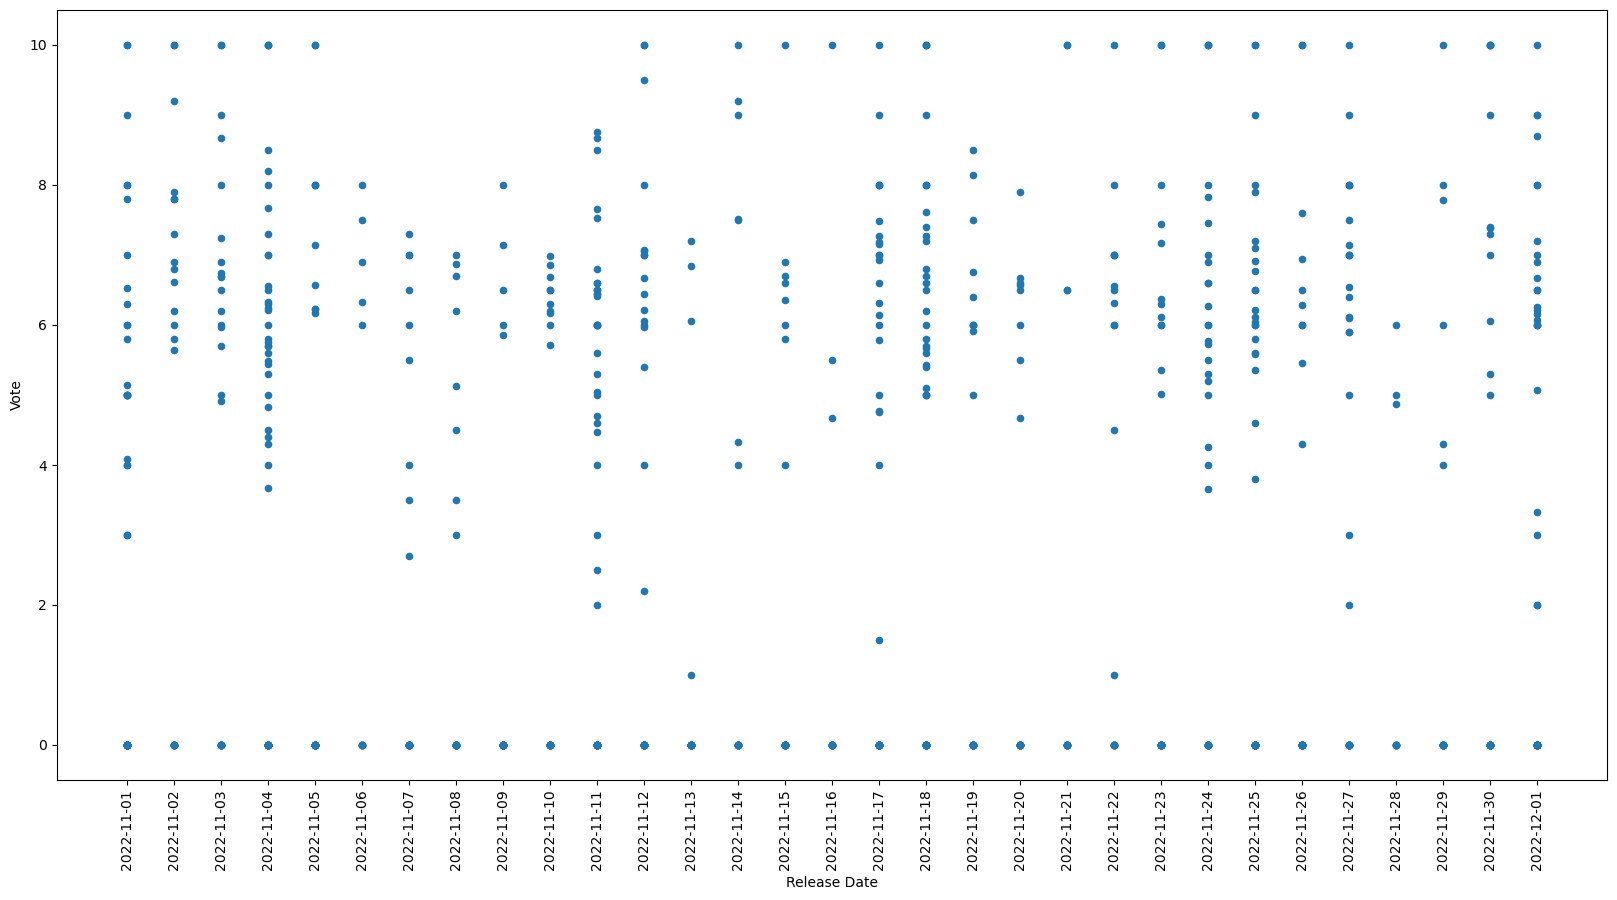

In [28]:
df.plot(kind="scatter", x="Release Date", y="Vote", rot=90, figsize=(20,10))
plt.show()

# scatter plot needs work.

In [29]:
#requests.get(f'{base_url}/movie/1159307?&api_key={api_key}').json()


{'adult': False,
 'backdrop_path': None,
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [],
 'homepage': '',
 'id': 1159307,
 'imdb_id': None,
 'original_language': 'en',
 'original_title': 'Entrevoir',
 'overview': 'Brief conversations of light that surfaced during hours of leisure and recovery.',
 'popularity': 0.6,
 'poster_path': '/lW0A2dcjn3Wbqrsa39miebCYsyV.jpg',
 'production_companies': [],
 'production_countries': [],
 'release_date': '2022-12-01',
 'revenue': 0,
 'runtime': 5,
 'spoken_languages': [],
 'status': 'Released',
 'tagline': '',
 'title': 'Entrevoir',
 'video': False,
 'vote_average': 0.0,
 'vote_count': 0}